In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,NaN,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	1
float64		column 3	0
float64		column 4	0
float64		column 5	1
float64		column 6	2
float64		column 7	1
float64		column 8	3
float64		column 9	1
float64		column 10	1
float64		column 11	0
float64		column 12	0
float64		column 13	1


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,174.000000,177.000000,178.000000,178.000000,177.000000,176.000000,177.000000,175.000000,177.000000,177.000000,178.000000,178.000000,177.000000
mean,13.010287,2.338701,2.366517,19.494944,99.785311,2.296023,2.032881,0.363543,1.590734,5.071977,0.957449,2.611685,742.553672
std,0.810392,1.119873,0.274344,3.339564,14.311042,0.628857,1.000526,0.124822,0.573978,2.317426,0.228572,0.709990,310.417495
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.370000,1.600000,2.210000,17.200000,88.000000,1.735000,1.200000,0.270000,1.250000,3.250000,0.782500,1.937500,500.000000
50%,13.050000,1.860000,2.360000,19.500000,98.000000,2.355000,2.140000,0.340000,1.550000,4.700000,0.965000,2.780000,672.000000
75%,13.677500,3.100000,2.557500,21.500000,107.000000,2.800000,2.880000,0.445000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

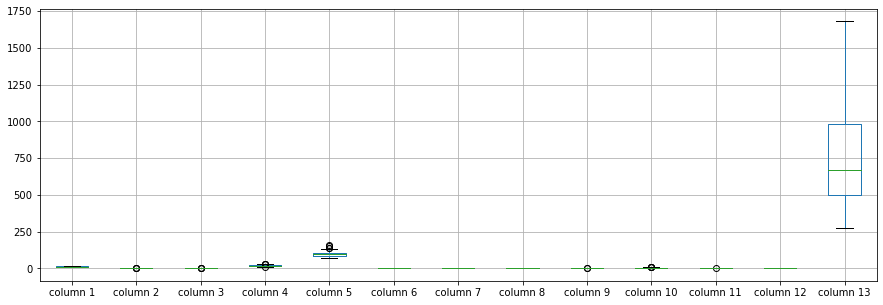

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.010287
column 2       2.338701
column 3       2.366517
column 4      19.494944
column 5      99.785311
column 6       2.296023
column 7       2.032881
column 8       0.363543
column 9       1.590734
column 10      5.071977
column 11      0.957449
column 12      2.611685
column 13    742.553672
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.106319,0.230474,-0.306405,0.313771,0.280100,0.235304,-0.183674,0.135261,0.544833,-0.071928,0.076215,0.657672
column 2,0.106319,1.000000,0.167632,0.288953,-0.045503,-0.340953,-0.407943,0.290539,-0.221299,0.264018,-0.560861,-0.368745,-0.184950
column 3,0.230474,0.167632,1.000000,0.443367,0.286644,0.127409,0.115125,0.185051,0.009702,0.260017,-0.074667,0.003911,0.227840
column 4,-0.306405,0.288953,0.443367,1.000000,-0.082942,-0.320172,-0.349952,0.365862,-0.198044,0.023363,-0.273955,-0.276769,-0.446588
column 5,0.313771,-0.045503,0.286644,-0.082942,1.000000,0.212476,0.197122,-0.255114,0.235213,0.192590,0.054811,0.063734,0.393059
column 6,0.280100,-0.340953,0.127409,-0.320172,0.212476,1.000000,0.865492,-0.463153,0.615171,-0.061002,0.434318,0.705369,0.494148
column 7,0.235304,-0.407943,0.115125,-0.349952,0.197122,0.865492,1.000000,-0.544599,0.652221,-0.169729,0.542387,0.788877,0.487104
column 8,-0.183674,0.290539,0.185051,0.365862,-0.255114,-0.463153,-0.544599,1.000000,-0.378374,0.160237,-0.275401,-0.513900,-0.309701
column 9,0.135261,-0.221299,0.009702,-0.198044,0.235213,0.615171,0.652221,-0.378374,1.000000,-0.027858,0.295917,0.520378,0.328403
column 10,0.544833,0.264018,0.260017,0.023363,0.192590,-0.061002,-0.169729,0.160237,-0.027858,1.000000,-0.528722,-0.430550,0.309008


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+69,13+69+69,13+69+69,13+69+69+69+69,13+69+69+69+69+69,13+69+69+69+69+69+69,13+69+69+69+69+69,13+69+69+69+69,13+69+69+69,13+69+69,13+69,13], vae_layer = False, seed = 690)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 950.6828113902699
Epoch: 1 , loss: 952.2763505415483
Epoch: 2 , loss: 947.8111072887074
Epoch: 3 , loss: 952.6245339133523
Epoch: 4 , loss: 949.2814442027699
Epoch: 5 , loss: 953.3036499023438
Epoch: 6 , loss: 946.693769975142
Epoch: 7 , loss: 952.3504472212358
Epoch: 8 , loss: 950.3331132368608
Epoch: 9 , loss: 950.244179465554
Epoch: 10 , loss: 952.1244617808949
Epoch: 11 , loss: 948.4875765713779
Epoch: 12 , loss: 949.7365167791194
Epoch: 13 , loss: 946.9234397194602
Epoch: 14 , loss: 949.6775568181819
Epoch: 15 , loss: 939.6323852539062
Epoch: 16 , loss: 941.8531605113636
Epoch: 17 , loss: 948.7842906605114
Epoch: 18 , loss: 944.2543667879971
Epoch: 19 , loss: 934.3606567382812
Epoch: 20 , loss: 932.1337613192471
Epoch: 21 , loss: 937.490478515625
Epoch: 22 , loss: 936.2617409446023
Epoch: 23 , loss: 930.3231534090909
Epoch: 24 , loss: 927.7585282759233
Epoch: 25 , loss: 925.2006225585938
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.196026,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1482.8793858478439, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.13606797286309266

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.083974,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.260000,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.300000,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.240000,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.390000,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.520000,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.430000,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.430000,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.530000,1.46,9.30,0.60,1.62,840.0


In [20]:
imputations[-1].to_excel("Wine_NE_1(imp).xlsx", index=False, header=False)